## Importing libraries and Loading data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = "Customer Prediction Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   72091-KAR    Male   46     Yes   Karnataka                    8   
1   72092-PUN  Female   54     Yes      Punjab                    7   
2   72106-HAR  Female   59     Yes     Haryana                    4   
3   72117-ODI    Male   70     Yes      Odisha                   13   
4   72122-TAM    Male   50     Yes  Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                21        NaN           Yes            Yes  ...   
1                 8     Deal 5           Yes            Yes  ...   
2                13     Deal 2           Yes             No  ...   
3                22     Deal 2           Yes             No  ...   
4                30     Deal 2           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      96.599998   6424.250000           0.0   
1     Mailed Check      50.650002 

## Data Preprocessing

In [2]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Married', 'Online_Backup', 'Device_Protection_Plan',
                  'Multiple_Lines', 'Gender', 'Streaming_Music', 'Streaming_TV', 'Unlimited_Data', 'Streaming_Movies',
                  'Total_Refunds','Phone_Service' ], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'State', 'Value_Deal', 'Internet_Service', 'Internet_Type', 'Online_Security',
    'Premium_Support', 'Contract', 'Paperless_Billing', 'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

## Training Random Forest Model

In [3]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating Model

Confusion Matrix:
[[784  64]
 [144 210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       848
           1       0.77      0.59      0.67       354

    accuracy                           0.83      1202
   macro avg       0.81      0.76      0.78      1202
weighted avg       0.82      0.83      0.82      1202



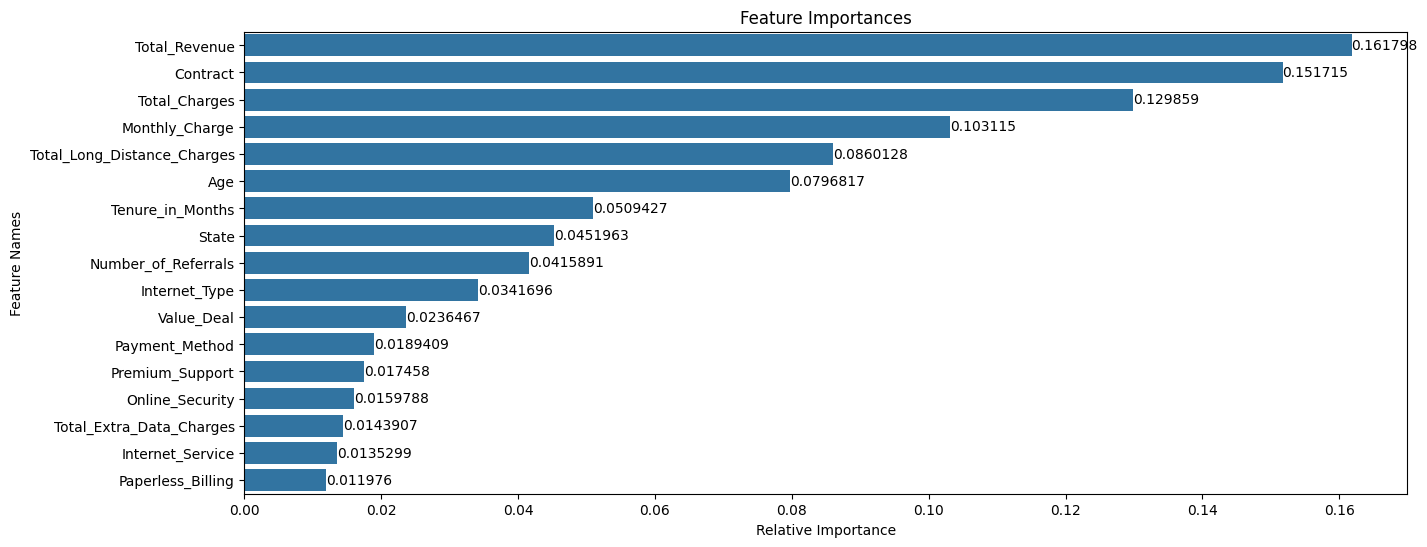

In [4]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
ax=sns.barplot(x=importances[indices], y=X.columns[indices])
ax.bar_label(ax.containers[0])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


## Using Model for Prediction on New Data

In [7]:
# Define the path to the Joiner Data Excel file
file_path1 ="Customer Prediction Data.xlsx"

# Define the sheet name to read data from
sheet_name1 = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path1, sheet_name=sheet_name1)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Customer_Status','Married', 'Online_Backup', 'Device_Protection_Plan',
                  'Multiple_Lines', 'Gender', 'Streaming_Music', 'Streaming_TV', 'Unlimited_Data', 'Streaming_Movies',
                  'Total_Refunds','Phone_Service' ], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"Predictions.csv", index=False)


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   72275-GUJ  Female   45     Yes         Gujarat                    8   
1   72357-MAD  Female   53      No  Madhya Pradesh                   14   
2   72391-UTT    Male   35      No   Uttar Pradesh                    1   
3   72469-MAD    Male   56      No  Madhya Pradesh                    9   
4   72971-TAM  Female   81      No      Tamil Nadu                    6   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 4        NaN           Yes             No  ...   
1                12     Deal 5           Yes             No  ...   
2                 7        NaN            No             No  ...   
3                 9        NaN           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      19.950001     47.700001           0.0   
1      Cre